In [1]:
import os
current_directory = os.getcwd()
print("Current_Working_Directory:", current_directory)

Current_Working_Directory: C:\Users\viraj\Code_a\Machine_learning\Dimensiion_Reduction


In [2]:
directory_path = "C:/Users/viraj/Code_a/Machine_learning/Dimensiion_Reduction"
contents = os.listdir(directory_path)
print("Contents")
for i in contents:
    print(i)

Contents
.ipynb_checkpoints
data.csv
Dimension_Reduction_Techniques.ipynb


## Introduction

## Today We'll Discuss About Feature Selection Techniques.

In [3]:
#Import the Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#reading the File
df=pd.read_csv("C:/Users/viraj/Code_a/Machine_learning/Dimensiion_Reduction/data.csv")

In [5]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df.shape

(8523, 12)

In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
df.dtypes  

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [9]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Missing Value Ratio

**bold text**
<strong>bold text</strong>
<b>bold text</b>

*italic text*
_italic text_
<em>italic text</em>
<i>italic text</i>
~strike text~
<strike>strike text</strike>
<del>strike text<del>
<u>underline text</u>

In [10]:
#checking the percentage of Missing values in each variable
df.isnull().sum()/len(df)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [11]:
#as we can seee there aren't so many variable that have missing variable more than 20%. Thus based on our undersatnding we can set
# a threshhold and remove those columns

In [12]:
# saving missing values in a variable
a = df.isnull().sum()/len(df)*100
# saving column names in a variable
variables = df.columns
variable = [ ]
for i in range(0,12):
    if a[i]<=20:   #setting the threshold as 20%
        variable.append(variables[i])
# Thus we can create a new datfram ewhere our new data would be those columns that dont have much missing values

## Low Variance Filter

In [13]:
df['Item_Weight'].fillna(df['Item_Weight'].median(), inplace=True)
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

In [14]:
df.isnull().sum()/len(df)*100

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

In [15]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [16]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [17]:
numerical_columns=df[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year','Item_Outlet_Sales']]

In [18]:
var = numerical_columns.var()
#numeric = numerical_columns.columns
variable = [ ]

In [19]:
var

Item_Weight                  1.786956e+01
Item_Visibility              2.662335e-03
Item_MRP                     3.878184e+03
Outlet_Establishment_Year    7.008637e+01
Item_Outlet_Sales            2.912141e+06
dtype: float64

In [20]:
for i in range(len(var)):
    if var[i] >= 10:   # setting the threshold as 10%
        if i + 1 < len(numerical_columns.columns):
            variable.append(numerical_columns.columns[i + 1])
variable           

['Item_Visibility', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']

## High Correlation filter

S0,imagine we have two columns in our dataset: one that tells us the temperature in Fahrenheit and another that tells us the temperature in Celsius. Now, we know that these two columns are related because they both describe the same thing, just using different units of measurement.

The High Correlation Filter is like having a friend who checks all the pairs of columns in our dataset to see how much they are related to each other. In our case, our friend notices that the temperature in Fahrenheit and the temperature in Celsius have a very strong relationship. When it's hot in Fahrenheit, it's also hot in Celsius, and when it's cold in Fahrenheit, it's cold in Celsius. They go hand in hand because there's a mathematical formula that connects them.

So, our friend says, "Hey, these two columns are highly correlated; they move together in a predictable way. You might not need both of them because if you know one, you can easily figure out the other. You can keep just one of them to save space and make your dataset less redundant."

The High Correlation Filter helps us identify these pairs of columns that are so closely related that keeping both of them doesn't give you much extra information. It's like decluttering our  dataset by removing duplicate or highly similar information, making it more efficient and easier to work with.

Now, even though we used the temperature example, the High Correlation Filter works in a similar way for any pairs of columns in your dataset, not just temperature-related ones. It helps us find and keep the most valuable and distinct information while reducing redundancy.

Eg:
Suppose we have the following dataset:

| Date       | Temperature_Fahrenheit | Temperature_Celsius |
|------------|------------------------|---------------------|
| 2022-01-01 | 68                     | 20                  |
| 2022-01-02 | 72                     | 22                  |
| 2022-01-03 | 75                     | 24                  |
| 2022-01-04 | 71                     | 21                  |
| 2022-01-05 | 73                     | 23                  |

In this dataset, we have two columns: "Temperature_Fahrenheit" and "Temperature_Celsius." As mentioned earlier, these columns are highly correlated because they represent the same temperature in different units. You can see that as the temperature in Fahrenheit increases, the temperature in Celsius increases in a consistent way.

In [21]:
pd.DataFrame(df)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [22]:
#Let's calculate the correlation between variables in Python. To do this, we'll start by excluding the dependent variable 
#'Item_Outlet_Sales' and save the remaining variables in a new DataFrame called dt.
dt = df.drop('Item_Outlet_Sales', axis=1)

In [23]:
# Select only the numeric columns
numeric_columns = dt.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation
correlation_matrix = numeric_columns.corr()

correlation_matrix

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Item_Weight,1.000000,-0.014168,0.024951,0.007739
Item_Visibility,-0.014168,1.000000,-0.001315,-0.074834
Item_MRP,0.024951,-0.001315,1.000000,0.005020
Outlet_Establishment_Year,0.007739,-0.074834,0.005020,1.000000


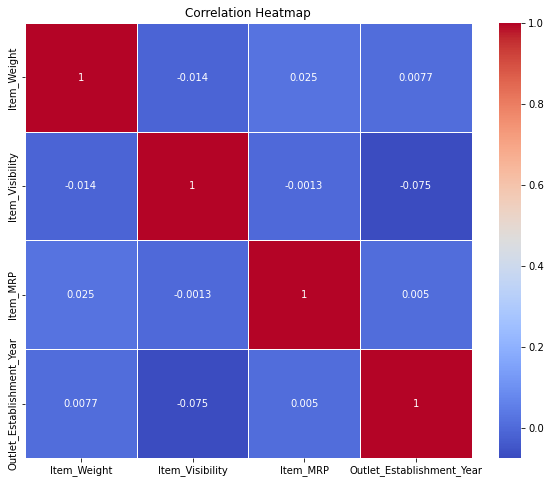

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Random Forest

S0,Imagine we're trying to predict whether it's going to be a hot or cold day based on some weather-related factors like humidity, wind speed, and cloud cover. Now, we have a lot of data with these factors, and we want to build a smart system that can make accurate predictions.

Random Forest is like having a team of decision-makers, each with their own set of rules, sitting in front of the data. Each decision-maker (or tree) in the Random Forest looks at a random subset of our data and comes up with its own prediction about whether it's going to be hot or cold based on the weather factors they see. So, one decision-maker might say, "It's hot because humidity is low," while another might say, "It's cold because there are a lot of clouds."

Now, imagine if we had just one decision-maker. They might make mistakes because they only see a small part of the data, and their rules might not be perfect. But with Random Forest, we have not just one, but a whole bunch of these decision-makers, each with their own ideas.

Random Forest then combines the predictions of all these decision-makers, and it's like they vote on whether it's going to be hot or cold. If most of them say "hot," the Random Forest predicts a hot day. If most say "cold," it predicts a cold day.

The cool thing about Random Forest is that it's like having multiple experts looking at your data from different angles and voting on the outcome. It tends to make more accurate predictions because it takes into account a variety of perspectives.

Moreover, in our temperature example, if we had a lot of temperature-related features, like both Fahrenheit and Celsius temperatures, the Random Forest would consider all of them and decide which ones are the most important for making predictions.

So, Random Forest is a powerful tool in machine learning for making predictions based on complex data. It's like having a team of decision-makers that work together to give us the best possible answer.

In [25]:
from sklearn.ensemble import RandomForestRegressor
dtt=df.drop(['Item_Identifier', 'Outlet_Identifier','Item_Outlet_Sales'], axis=1)

In [26]:
model = RandomForestRegressor(random_state=1, max_depth=10)
dtt=pd.get_dummies(dtt)
dtt

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,1999,False,True,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False
1,5.920,0.019278,48.2692,2009,False,False,True,False,False,False,...,False,True,False,False,False,True,False,False,True,False
2,17.500,0.016760,141.6180,1999,False,True,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False
3,19.200,0.000000,182.0950,1998,False,False,True,False,False,False,...,False,True,False,False,False,True,True,False,False,False
4,8.930,0.000000,53.8614,1987,False,True,False,False,False,False,...,True,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,False,True,False,False,False,False,...,True,False,False,False,False,True,False,True,False,False
8519,8.380,0.046982,108.1570,2002,False,False,True,False,False,True,...,False,True,False,False,True,False,False,True,False,False
8520,10.600,0.035186,85.1224,2004,False,True,False,False,False,False,...,False,False,True,False,True,False,False,True,False,False
8521,7.210,0.145221,103.1332,2009,False,False,True,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [27]:
df.Item_Outlet_Sales

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [28]:
model.fit(dtt,df.Item_Outlet_Sales)

RandomForestRegressor(max_depth=10, random_state=1)

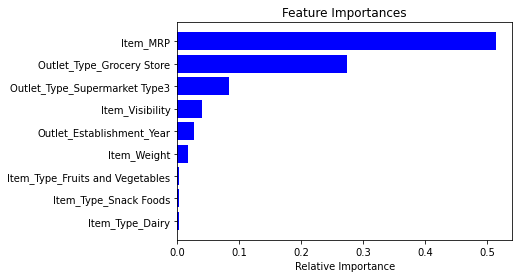

In [29]:
features = dtt.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Alernatively, we can use the SelectFromModel of sklearn to do so. It selects the features based on the importance of their weights.

In [30]:
from sklearn.feature_selection import SelectFromModel

#RandomForestRegressor model
model = RandomForestRegressor(random_state=1, max_depth=10)
model.fit(dtt, df.Item_Outlet_Sales) #fit the model

# Create a SelectFromModel object using the trained model and a threshold (you can adjust the threshold)
sfm = SelectFromModel(model,threshold=0.05)  # Adjust the threshold as needed

# Transforming feature matrix to select the important features
selected_features = sfm.transform(dtt)
selected_indices = sfm.get_support(indices=True)

# Geting names of the selected features
selected_feature_names = [features[i] for i in selected_indices]
print("Selected Features:")
print(selected_feature_names)


Selected Features:
['Item_MRP', 'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type3']


C:\Users\viraj\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


## Backward Feature Elimination

So,Imagine we have a bunch of different columns in our dataset, and we want to figure out which ones are the most important for predicting whether it's going to be a hot or cold day. You know that some columns, like humidity, cloud cover, and wind speed, might be relevant, but we're not sure about others.

Backward Feature Elimination is like playing a game of "Guess the Important Columns" with our data. Here's how it works:

1. We start with all the columns in our dataset, including the ones we're not sure about.

2. Then, we build a model (like a Random Forest) to predict whether it's hot or cold based on all those columns.

3. Now, we look at how well our model did. Did it make accurate predictions? Or did it make a lot of mistakes?

4. The trick with Backward Feature Elimination is that we start removing one column at a time—the one you suspect might be the least important. WE then rebuild our model without that column and see if it does better or worse.

5. If removing that column improves our model's accuracy, it means that column wasn't very important, and you keep it out.

6. You repeat this process, removing one column at a time and checking if it helps or hurts our model's performance. We keep doing this until removing any more columns makes our model worse.

7. Finally, we're left with the columns that are the most important for making accurate predictions about whether it's hot or cold. These are the ones you keep.

So, Backward Feature Elimination is like a step-by-step process of playing detective with your columns. We start with everything and then eliminate the ones that don't seem to contribute much to making good predictions. It's a smart way to find the most critical factors for our analysis while leaving out the less important ones.

In [31]:
#Select Features
['Item_Visibility', 'Item_MRP', 'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type3']


['Item_Visibility',
 'Item_MRP',
 'Outlet_Type_Grocery Store',
 'Outlet_Type_Supermarket Type3']

In [32]:
dp=df.select_dtypes(include=['float64', 'int64'])
dp

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
# seperate the target and independent variable
X = dp.drop(columns = ['Item_Outlet_Sales','Item_Weight'],axis=1)
Y = dp['Item_Outlet_Sales']

# create the object of the model
lreg = LinearRegression()

# specify the number of  features to select 
rfe = RFE(estimator=lreg,n_features_to_select= 3)

# fit the model
rfe = rfe.fit(X, Y)

print('\n\nFEATUERS SELECTED\n\n')
print(rfe.support_)

print('\n\nRANKING OF FEATURES\n\n')
print(rfe.ranking_)



FEATUERS SELECTED


[ True  True  True]


RANKING OF FEATURES


[1 1 1]


## Forward Feature Selection

 SO,Imagine we have a dataset with various columns, each representing different factors that could help us predict whether it's going to be a hot or cold day. These columns could include humidity, wind speed, cloud cover, and more.

Forward Feature Selection is like going on a journey to discover which factors are the most important for making accurate predictions.

Here's how it works:

1. You start with an empty basket, representing our model with no factors considered yet.

2. Then, we take one of the columns, let's say "humidity," and put it in our basket. This column becomes our first feature.

3. Now, we build a model using only this one feature to predict whether it's hot or cold. We check how well the model does.

4. If the model does a good job with just one feature (in this case, humidity), we say, "Great! Humidity is important!" and we keep it in your basket.

5. Next, we look at the remaining columns, like wind speed, cloud cover, and so on. You take one of them, let's say "wind speed," and add it to your basket, alongside humidity.

6. We now have a model with two features: humidity and wind speed. We check how well this model predicts hot or cold days.

7. If adding "wind speed" makes your model even better, we say, "Awesome! Wind speed is important too!" and we keep it.

8. We repeat this process, adding one column at a time, checking if it improves your model's accuracy. If a new column helps, you keep it; if it doesn't, you leave it out.

9. We keep doing this until you've gone through all the columns, building our model step by step and selecting the features that make our predictions most accurate.

So, Forward Feature Selection is like building your prediction model from scratch and adding the most important factors one by one. It helps you discover which columns or features are the most valuable for making predictions about whether it's going to be a hot or cold day."

In [34]:
from sklearn.feature_selection import f_regression
ffs = f_regression(dtt,df.Item_Outlet_Sales )

In [35]:
variable = [ ]
for i in range(0,len(dtt.columns)-1):
    if ffs[0][i] >=10:
       variable.append(dtt.columns[i])

In [36]:
variable

['Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Type_Baking Goods',
 'Outlet_Size_Medium',
 'Outlet_Size_Small',
 'Outlet_Location_Type_Tier 1',
 'Outlet_Location_Type_Tier 2',
 'Outlet_Location_Type_Tier 3',
 'Outlet_Type_Grocery Store',
 'Outlet_Type_Supermarket Type1',
 'Outlet_Type_Supermarket Type2']

### LETS discuss the Dimension Reduction techniques in the Next Notebook.